# Deep Learning Image Recognition (Image classification) :  TensorFlow, and Keras  
THE MNIST DATABASE 
(short for Mixed National Institute of Standards and Technology database)  
of handwritten digits  
http://yann.lecun.com/exdb/mnist/  
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.  
The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field. Here, we unroll the 28×28 pixels into 1D row vectors, which represent the rows in our image array (784 per row or image).

In [33]:
import os
import struct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:

def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte' % kind)
        
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', 
                                 lbpath.read(8))
        labels = np.fromfile(lbpath, 
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", 
                                               imgpath.read(16))
        images = np.fromfile(imgpath, 
                        dtype=np.uint8).reshape(len(labels), 784)
 
    return images, labels

In [10]:
print(os.listdir('./Data/mnist_handwritten_digits/'))
X_train, y_train = load_mnist('./Data/mnist_handwritten_digits/', kind='train')
X_train.shape[0], X_train.shape[1]

['script.py', 't10k-images-idx3-ubyte.gz', 't10k-images.idx3-ubyte', 't10k-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte', 'train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte', 'train-labels-idx1-ubyte.gz']


(60000, 784)

In [12]:
X_test, y_test = load_mnist('./Data/mnist_handwritten_digits/', kind='t10k')
X_test.shape[0], X_test.shape[1]

(10000, 784)

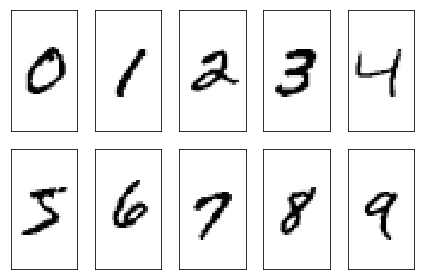

In [35]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()

[]

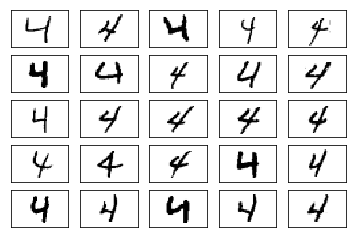

In [36]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 4][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2', multi_class='ovr', solver='newton-cg')
lr.fit(X_train[:1000, :], y_train[:1000])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
lr.score(X_test, y_test), lr.score(X_train, y_train)

(0.84230000000000005, 0.8383666666666667)

# keras with TensorFlow as backend

In [56]:
# one-hot encoding class labels
from keras.utils import np_utils
# y_train_OneHotEncoding = pd.get_dummies(y_train)
y_train_OneHotEncoding = np_utils.to_categorical(y_train) 

y_train[:10], y_train_OneHotEncoding[:10]

(array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8),
 array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]]))

In [57]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

np.random.seed(1) 

model = Sequential()
model.add(Dense(input_dim=X_train.shape[1], 
                units=50, 
                init='uniform', 
                activation='tanh'))

model.add(Dense(input_dim=50, 
                units=50, 
                init='uniform', 
                activation='tanh'))

model.add(Dense(input_dim=50, 
                units=y_train_OneHotEncoding.shape[1], 
                init='uniform', 
                activation='softmax'))

sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

model.fit(X_train, y_train_OneHotEncoding, epochs=50, 
          batch_size=200, verbose=1, shuffle=True,
          validation_split=0.1)

C:\Users\Xianhui\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="tanh", units=50, kernel_initializer="uniform")`
C:\Users\Xianhui\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="tanh", units=50, kernel_initializer="uniform")`
C:\Users\Xianhui\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="softmax", units=10, kernel_initializer="uniform")`


Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 5s - loss: 2.1415 - val_loss: 1.8288
Epoch 2/50
54000/54000 [==============================] - 1s - loss: 1.4356 - val_loss: 1.0812
Epoch 3/50
54000/54000 [==============================] - 1s - loss: 0.9421 - val_loss: 0.7495
Epoch 4/50
54000/54000 [==============================] - 1s - loss: 0.6956 - val_loss: 0.5581
Epoch 5/50
54000/54000 [==============================] - 1s - loss: 0.5619 - val_loss: 0.4660
Epoch 6/50
54000/54000 [==============================] - 2s - loss: 0.4902 - val_loss: 0.4164
Epoch 7/50
54000/54000 [==============================] - 1s - loss: 0.4447 - val_loss: 0.3699
Epoch 8/50
54000/54000 [==============================] - 1s - loss: 0.4058 - val_loss: 0.3448
Epoch 9/50
54000/54000 [==============================] - 1s - loss: 0.3920 - val_loss: 0.3309
Epoch 10/50
54000/54000 [==============================] - 1s - loss: 0.3743 - val_loss: 0.3279


In [61]:
y_train_pred = model.predict_classes(X_train, verbose=0)
train_acc = np.sum(y_train == y_train_pred, axis=0, dtype='float') / X_train.shape[0]
y_test_pred = model.predict_classes(X_test, verbose=0)
test_acc = np.sum(y_test == y_test_pred, axis=0, dtype='float') / X_test.shape[0]
print('train acc {}, test acc {} '.format(train_acc*100, test_acc*100))

train acc 93.81166666666667, test acc 93.37 


In [60]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_38 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_39 (Dense)             (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


Deep neural network using Keras and tensorflow achieved better accuracy than shallow learning algorithms

References:  https://github.com/Einsteinish/Artificial-Neural-Networks-with-Jupyter/blob/master/part10-Theano.ipynb